1) Import libraries and read dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.image as mpimg
import warnings
from sklearn.preprocessing import LabelEncoder
plt.style.use('ggplot')
pd.pandas.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('housing.csv')

In [6]:
df.shape

(20640, 10)

In [7]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

2) Display descriptive statistics

In [8]:
stats = df.describe()
stats= stats.T
stats

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


3) Plot descriptive statistics for each feature on a distribution plot

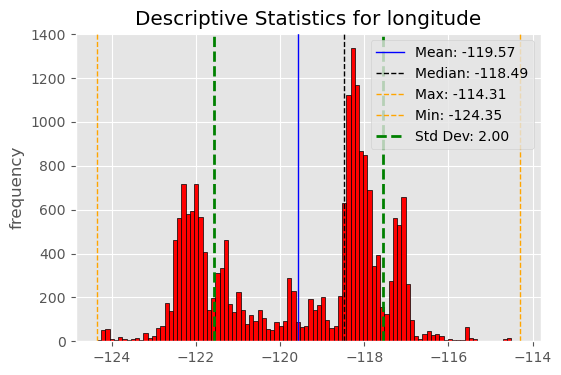

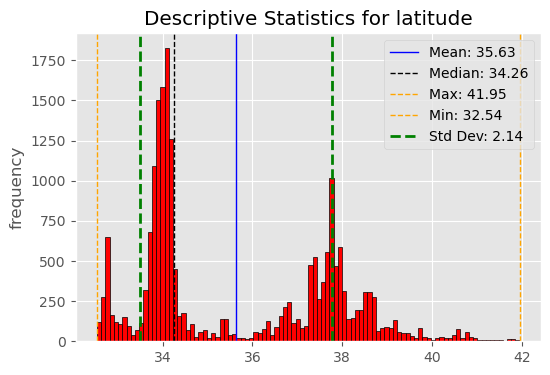

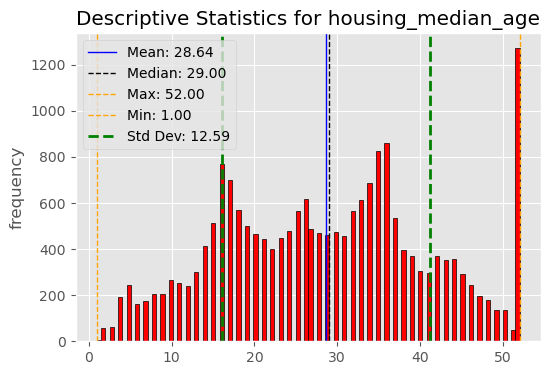

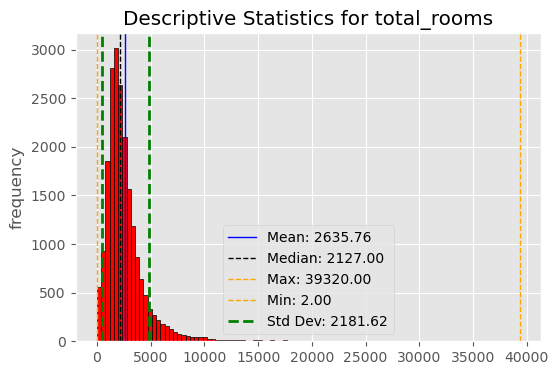

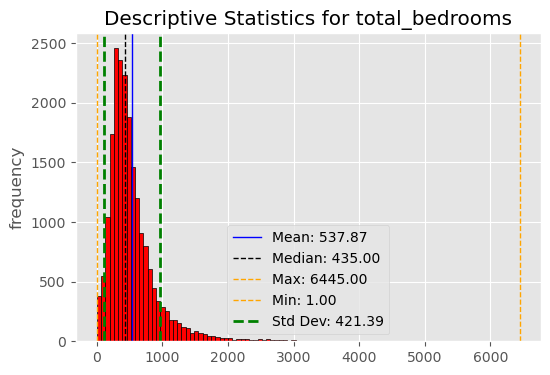

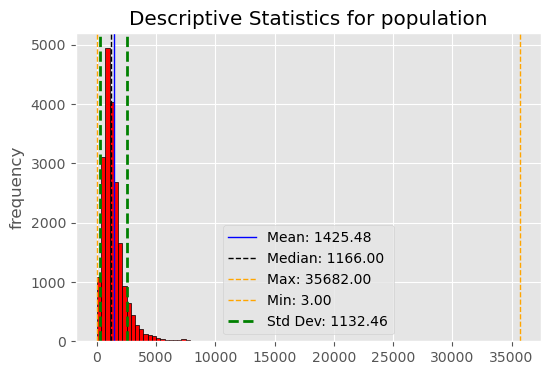

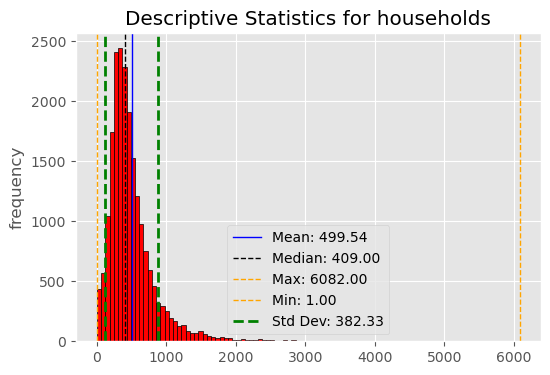

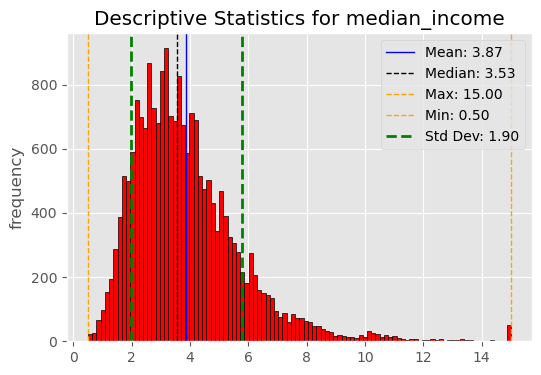

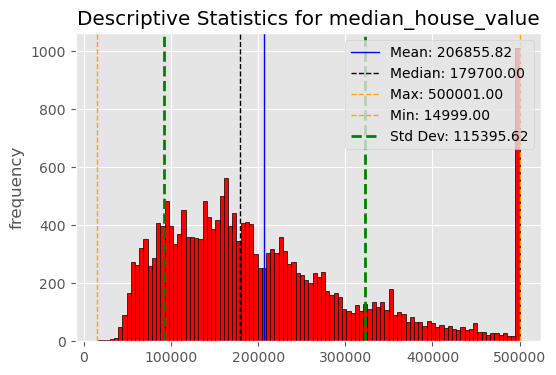

In [9]:
desc_stats = stats.drop(columns=['count'])
for attrib in desc_stats.index:
    mean_value = df[attrib].mean()
    std_dev = df[attrib].std()
    max_val = df[attrib].max()
    min_val = df[attrib].min() 
    
    plt.figure(figsize=(6, 4))
    plt.hist(df[attrib], bins=100, color='red', edgecolor='black')
    plt.title(f'Descriptive Statistics for {attrib}')
    plt.ylabel('frequency')
    
    plt.axvline(df[attrib].mean(), color='blue', linestyle='solid', linewidth=1, label=f'Mean: {df[attrib].mean():.2f}')
    plt.axvline(df[attrib].median(), color='black', linestyle='dashed', linewidth=1, label=f'Median: {df[attrib].median():.2f}')
    plt.axvline(max_val, color='orange', linestyle='dashed', linewidth=1, label=f'Max: {max_val:.2f}')
    plt.axvline(min_val, color='orange', linestyle='dashed', linewidth=1, label=f'Min: {min_val:.2f}')
    
    plt.axvline(mean_value - std_dev, color='green', linestyle='dashed', linewidth=2, label=f'Std Dev: {std_dev:.2f}')
    plt.axvline(mean_value + std_dev, color='green', linestyle='dashed', linewidth=2)
    
    plt.legend()
plt.grid(True)


4) Find the columns with missing elements in tuple and implace with median

In [10]:
missing_attrib = df.columns[df.isnull().any()]
tot_missing = df.isnull().sum().sum()

df_cop = df.copy()

print('Columns with missing elements: ')
for attrib in missing_attrib:
    df_cop[attrib].fillna(df[attrib].median(), inplace = True)
    print(f'    {attrib}')

Columns with missing elements: 
    total_bedrooms


In [11]:
tot = df.isnull().sum().sum()  
print(f'Total number of tuples with missing elements: {tot}')

Total number of tuples with missing elements: 207


5) Graph the before and after plot of inserting a median value

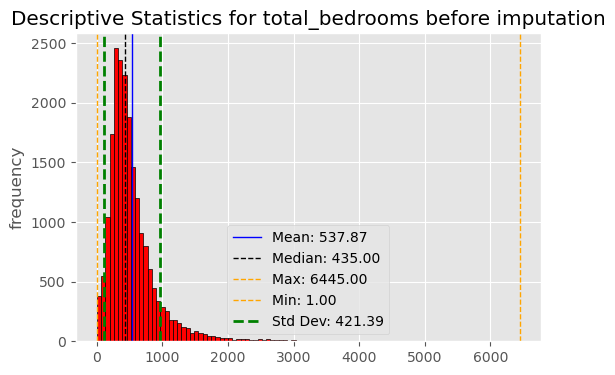

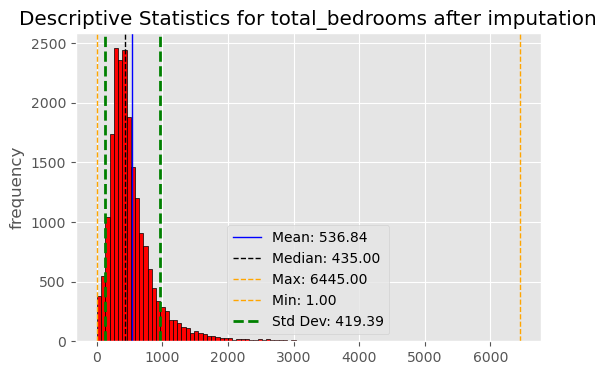

In [12]:
def plot_fun1(attrib):
    df_copy = df.copy()
    df_copy[attrib] = np.where(df[attrib].isnull(), 1, 0)
    df_copy.groupby(attrib)['median_house_value'].median().plot.bar()
    plt.title(attrib)
    plt.ylabel('Median house value')
    plt.xlabel('Before and after imputing median value')
    plt.show()
    
def plot_fun2(df, attrib, string):
    mean_value = df[attrib].mean()
    std_dev = df[attrib].std()
    max_val = df[attrib].max()
    min_val = df[attrib].min() 
    
    plt.figure(figsize=(6, 4))
    plt.hist(df[attrib], bins=100, color='red', edgecolor='black')
    plt.title(f'Descriptive Statistics for {attrib} {string}')
    plt.ylabel('frequency')
    
    plt.axvline(df[attrib].mean(), color='blue', linestyle='solid', linewidth=1, label=f'Mean: {df[attrib].mean():.2f}')
    plt.axvline(df[attrib].median(), color='black', linestyle='dashed', linewidth=1, label=f'Median: {df[attrib].median():.2f}')
    plt.axvline(max_val, color='orange', linestyle='dashed', linewidth=1, label=f'Max: {max_val:.2f}')
    plt.axvline(min_val, color='orange', linestyle='dashed', linewidth=1, label=f'Min: {min_val:.2f}')
    
    plt.axvline(mean_value - std_dev, color='green', linestyle='dashed', linewidth=2, label=f'Std Dev: {std_dev:.2f}')
    plt.axvline(mean_value + std_dev, color='green', linestyle='dashed', linewidth=2)
    
    plt.legend()
    
for attrib in missing_attrib:
    plot_fun2(df,attrib, "before imputation")
    df_cop = df.copy()
    df_cop.fillna(df_cop[attrib].median(), inplace = True)
    plot_fun2(df_cop,attrib, "after imputation")
    

#### Notice that adding the median value to the empty cells has increased the height of bar corresponding to median(dashed black line) of the graph above. Mean reduced because earlier the NaN tuples were not being included in the calculation of mean. (n becomes n + 207)

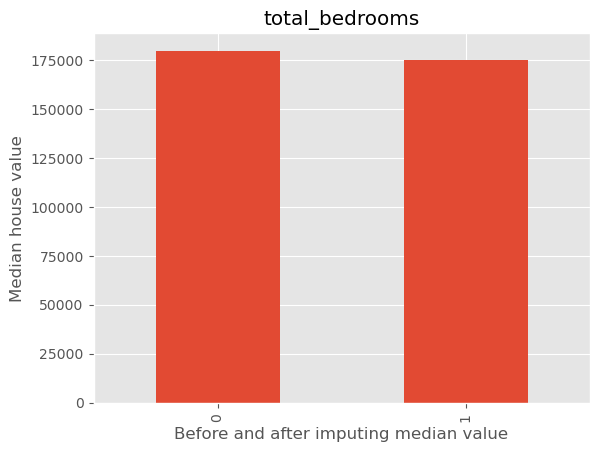

In [13]:
for attrib in missing_attrib:
    plot_fun1(attrib)

#### Notice that the median house value has reduced after the imputation

7) Removing duplicates

In [14]:
df_cop.drop_duplicates()
df_cop

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


#### There are no duplicates in the above dataframe which is why no tuples have been removed from the dataframe.

8) Heat map to enhance visualisation alongside the original map

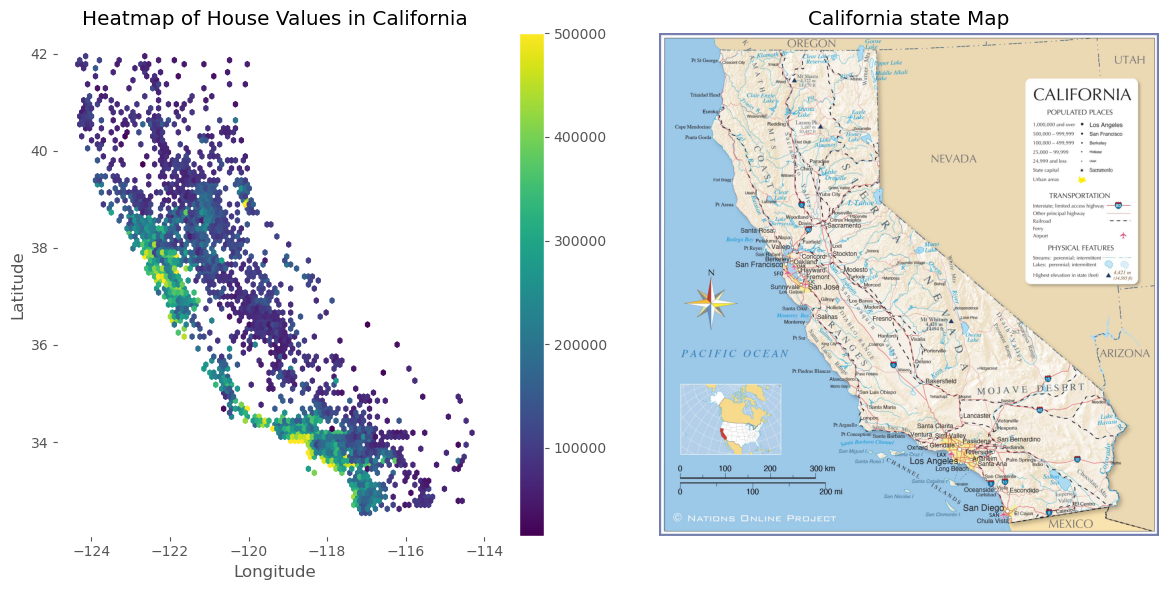

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

hb = axs[0].hexbin(df_cop['longitude'], df_cop['latitude'], C=df_cop['median_house_value'], reduce_C_function=np.mean)

axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')
axs[0].set_title('Heatmap of House Values in California')
axs[0].set_facecolor('white')

cbar = fig.colorbar(hb, ax=axs[0])

img = mpimg.imread('California_map.jpg')
axs[1].imshow(img)
axs[1].axis('off') 
axs[1].set_title('California state Map')

plt.tight_layout()
plt.show()

9) Some observations

In [16]:
df_cop[df_cop['total_rooms']>=1500].shape

(15044, 10)

In [17]:
df_cop[(df_cop['ocean_proximity'] == 'NEAR BAY')].max()

longitude              -122.01
latitude                 38.34
housing_median_age          52
total_rooms              18634
total_bedrooms          3226.0
population                8276
households                3589
median_income          15.0001
median_house_value      500001
ocean_proximity       NEAR BAY
dtype: object

In [18]:
df_cop[(df_cop['median_house_value']>=10000) & (df_cop['total_bedrooms']>1550) & (df_cop['ocean_proximity']=='NEAR BAY')].shape

(51, 10)

10) Grouping the data and calculating the summary statistics

In [19]:
df.info()

grouped = df.groupby('ocean_proximity')
ocean_proximity_le = LabelEncoder()
df['ocean_proximity'] = ocean_proximity_le.fit_transform(df['ocean_proximity'])

summary_stats = grouped.describe()
summary_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


longitude                                                 \
                    count        mean       std     min     25%      50%   
ocean_proximity                                                            
<1H OCEAN          9136.0 -118.847766  1.588888 -124.14 -118.50 -118.275   
INLAND             6551.0 -119.732990  1.900950 -123.73 -121.35 -120.000   
ISLAND                5.0 -118.354000  0.070569 -118.48 -118.33 -118.320   
NEAR BAY           2290.0 -122.260694  0.147004 -122.59 -122.41 -122.250   
NEAR OCEAN         2658.0 -119.332555  2.327307 -124.35 -122.02 -118.260   

                                  latitude                                     \
                      75%     max    count       mean       std    min    25%   
ocean_proximity                                                                 
<1H OCEAN       -118.0000 -116.62   9136.0  34.560577  1.467127  32.61  33.86   
INLAND          -117.8400 -114.31   6551.0  36.731829  2.116073  32.64  34.18   
ISLAND          -118.3200 -118.32      5.0  33.358000  0.040866  33.33  33.34   
NEAR BAY        -122.1400 -122.01   2290.0  37.801057  0.185434  37.35  37.73   
NEAR OCEAN      -117.1825 -116.97   2658.0  34.738439  2.275386  32.54  32.78   

                                       housing_median_age             \
                   50%      75%    max              count       mean   
ocean_proximity                                                        
<1H OCEAN        34.03  34.2200  41.88             9136.0  29.279225   
INLAND           36.97  38.5500  41.95             6551.0  24.271867   
ISLAND           33.34  33.3500  33.43                5.0  42.400000   
NEAR BAY         37.79  37.9075  38.34             2290.0  37.730131   
NEAR OCEAN       33.79  36.9800  41.95             2658.0  29.347254   

                                                         total_rooms  \
                       std   min   25%   50%   75%   max       count   
ocean_proximity                                                        
<1H OCEAN        11.644453   2.0  20.0  30.0  37.0  52.0      9136.0   
INLAND           12.018020   1.0  15.0  23.0  33.0  52.0      6551.0   
ISLAND           13.164346  27.0  29.0  52.0  52.0  52.0         5.0   
NEAR BAY         13.070385   2.0  29.0  39.0  52.0  52.0      2290.0   
NEAR OCEAN       11.840371   2.0  20.0  29.0  37.0  52.0      2658.0   

                                                                            \
                        mean          std    min      25%     50%      75%   
ocean_proximity                                                              
<1H OCEAN        2628.343586  2160.463696   11.0  1464.00  2108.0  3141.00   
INLAND           2717.742787  2385.831111    2.0  1404.00  2131.0  3216.00   
ISLAND           1574.600000   707.545264  716.0   996.00  1675.0  2127.00   
NEAR BAY         2493.589520  1830.817022    8.0  1431.25  2083.0  3029.75   
NEAR OCEAN       2583.700903  1990.724760   15.0  1505.00  2195.0  3109.00   

                         total_bedrooms                                        \
                     max          count        mean         std    min    25%   
ocean_proximity                                                                 
<1H OCEAN        37937.0         9034.0  546.539185  427.911417    5.0  303.0   
INLAND           39320.0         6496.0  533.881619  446.117778    2.0  282.0   
ISLAND            2359.0            5.0  420.400000  169.320111  214.0  264.0   
NEAR BAY         18634.0         2270.0  514.182819  367.887605    1.0  289.0   
NEAR OCEAN       30405.0         2628.0  538.615677  376.320045    3.0  313.0   

                                       population                            \
                   50%     75%     max      count         mean          std   
ocean_proximity                                                               
<1H OCEAN        438.0  652.00  6445.0     9136.0  1520.290499  1185.848357   
INLAND        

11) Correlation heatmap

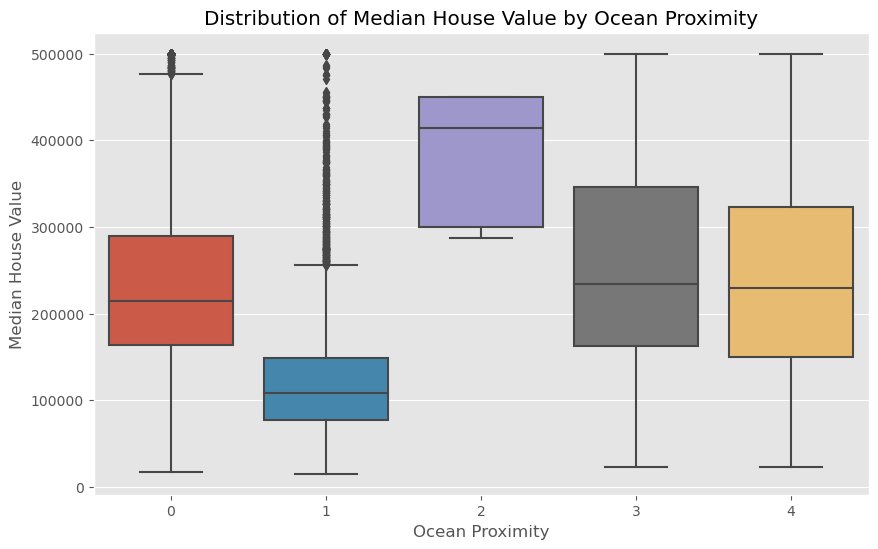

In [20]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)

plt.title('Distribution of Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.xticks(rotation=0)
plt.show()

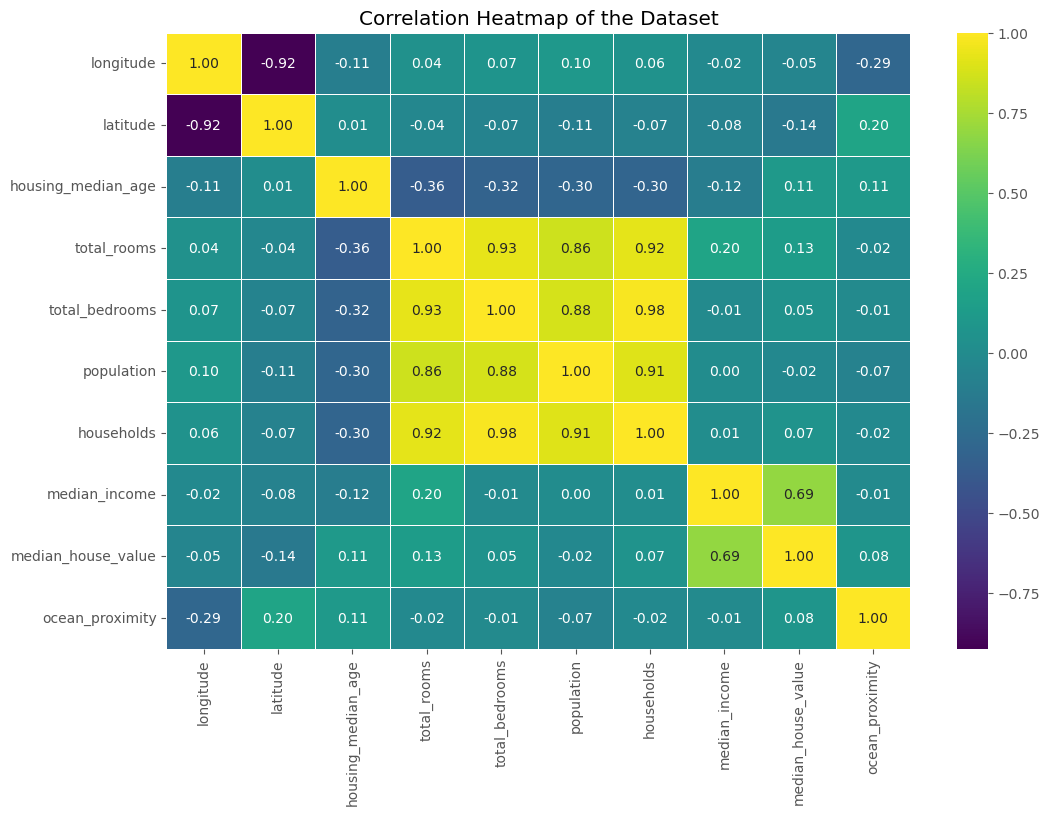

In [21]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of the Dataset')
plt.show()

#### Note that there will be an extra feature cost_per_sqft on running the code after the entire code is run once

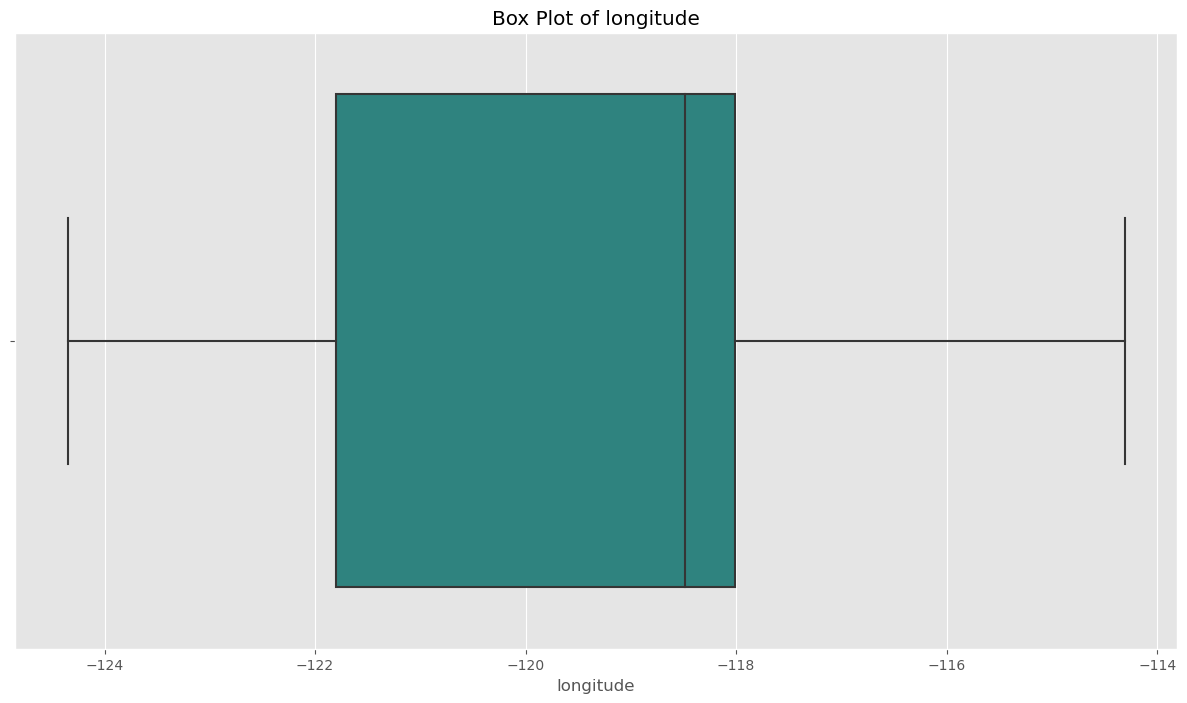

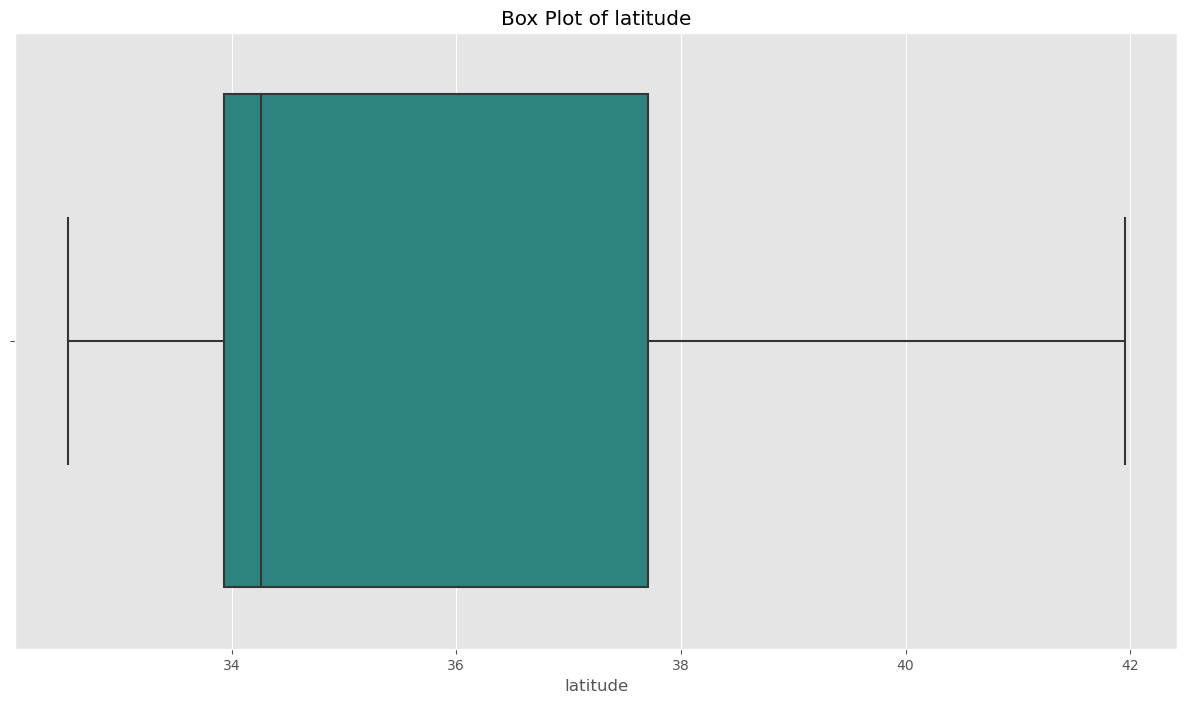

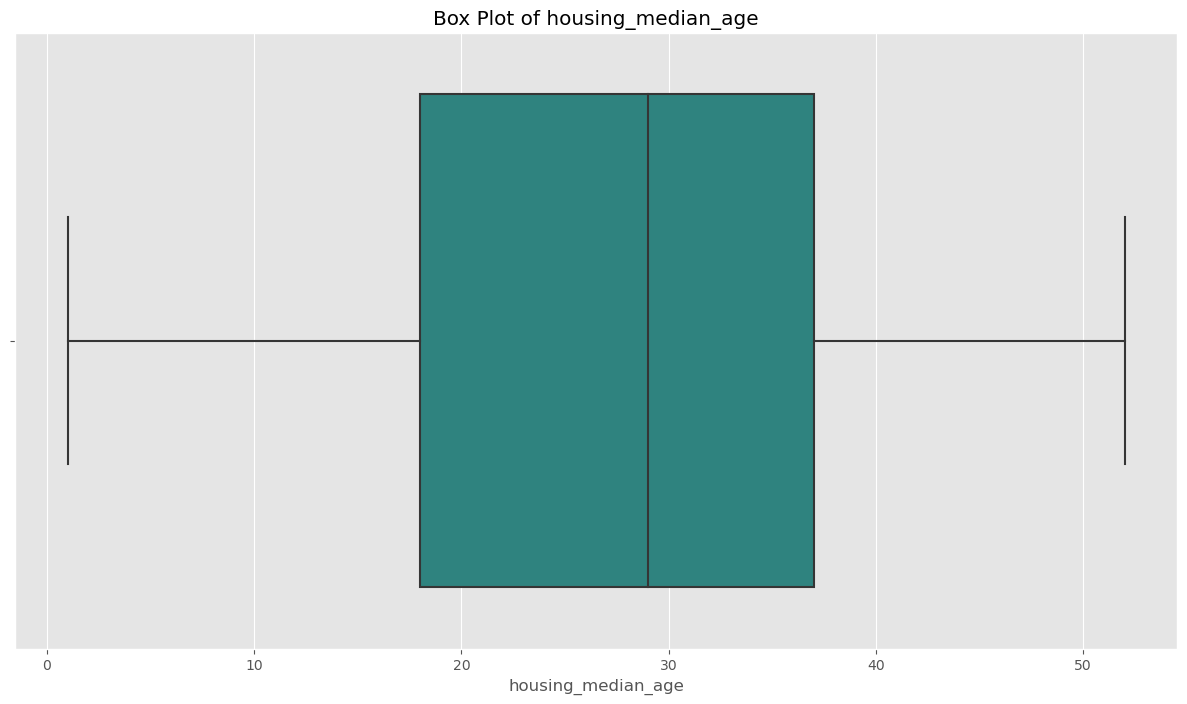

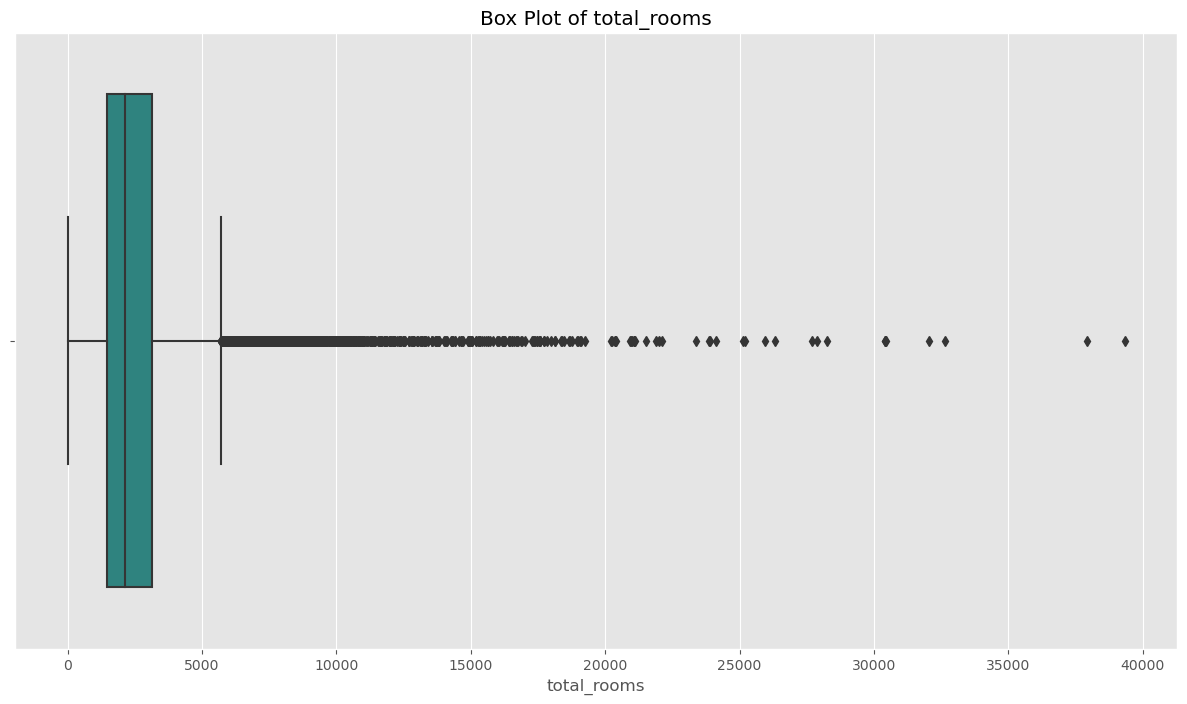

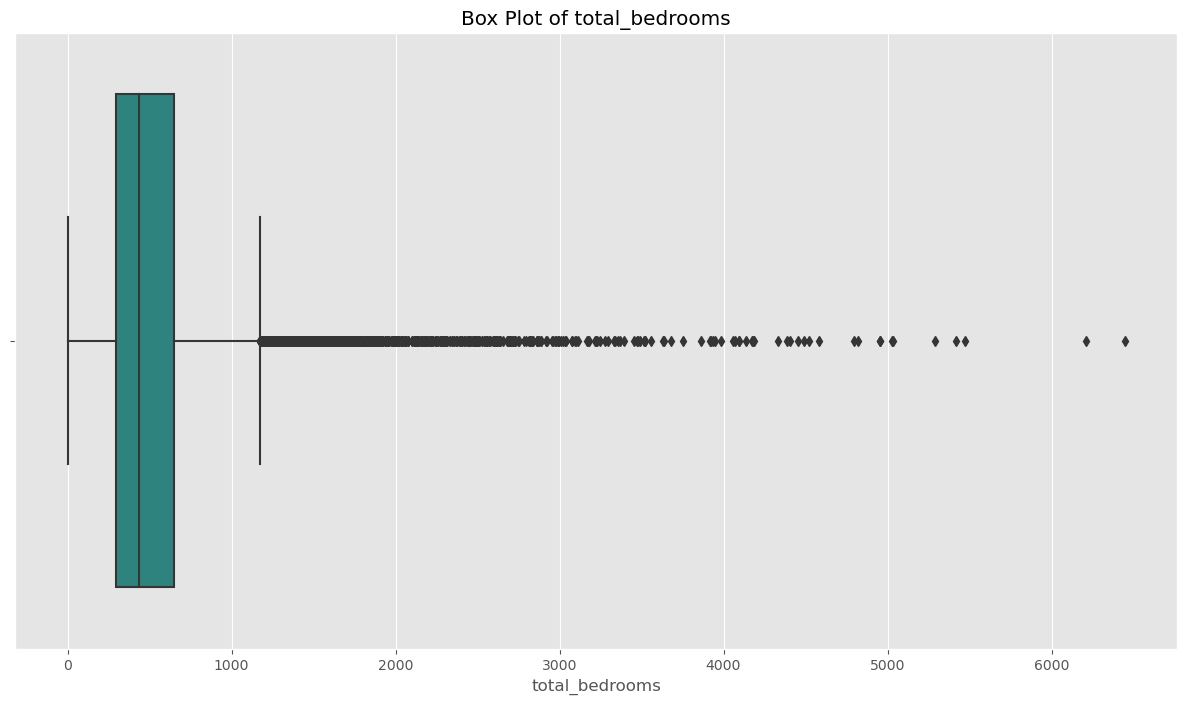

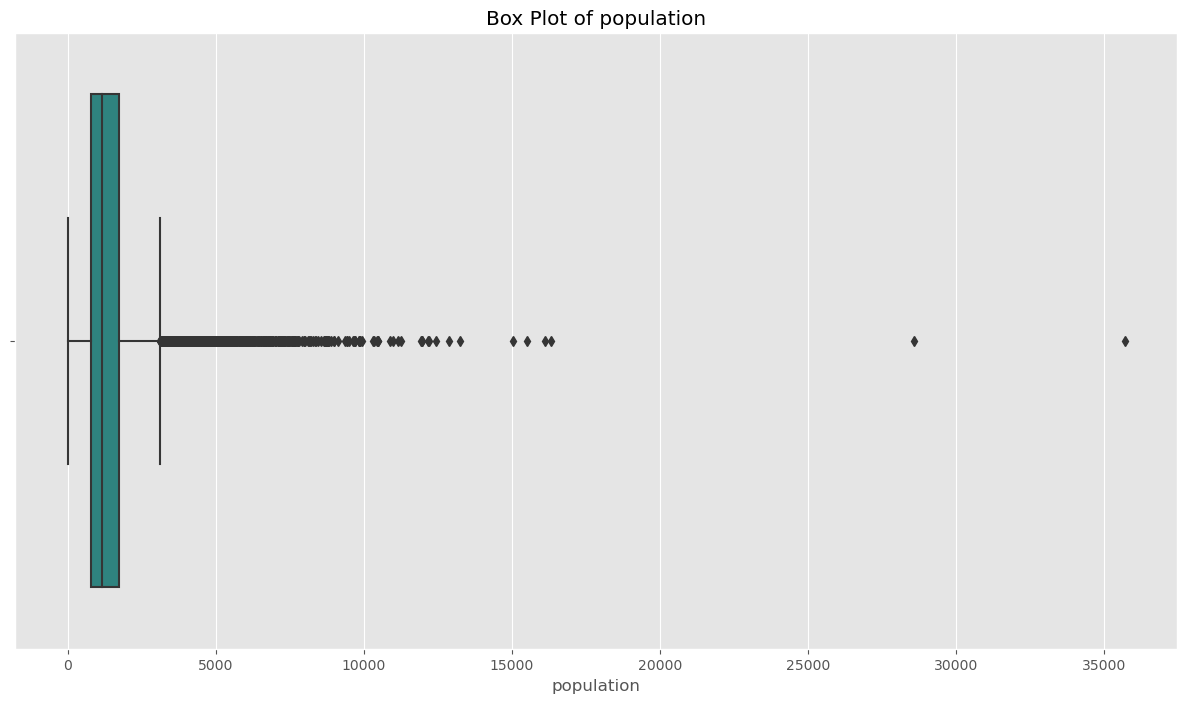

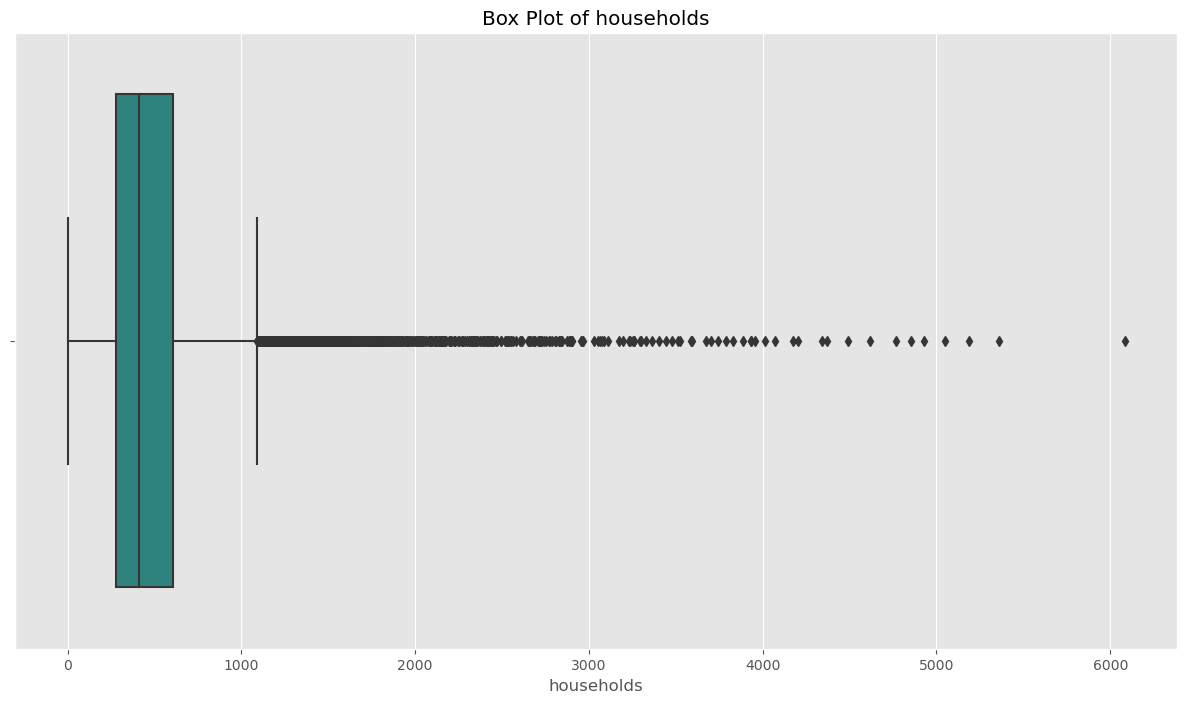

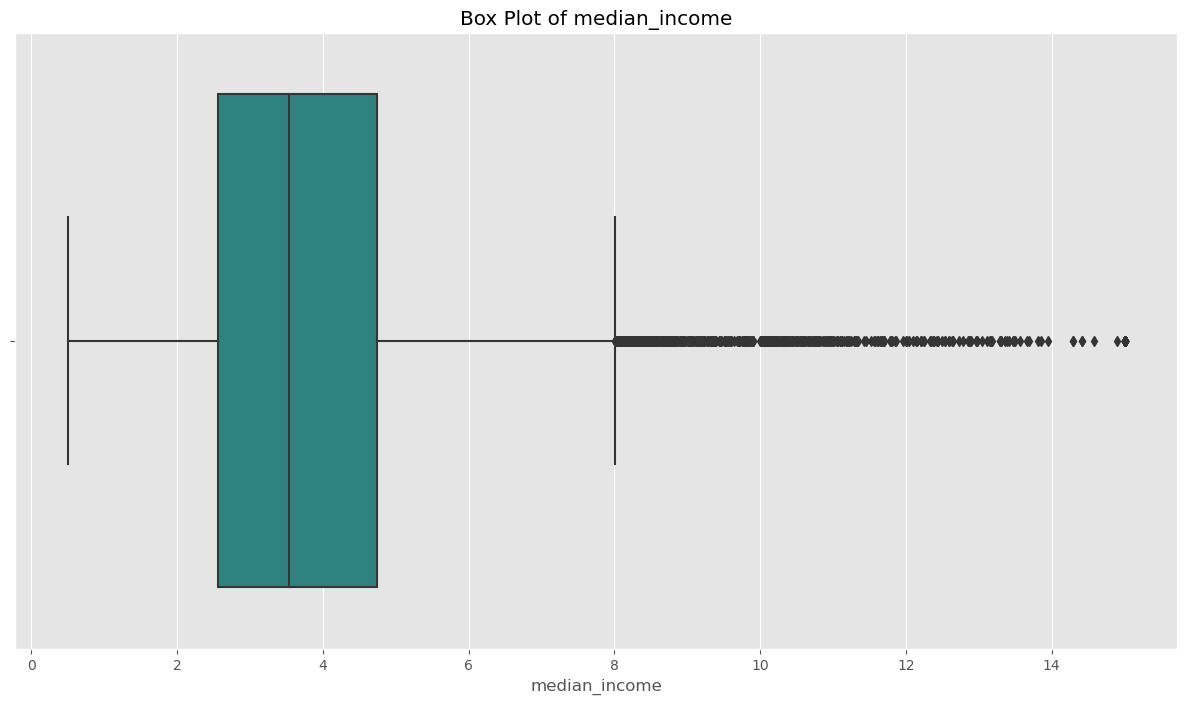

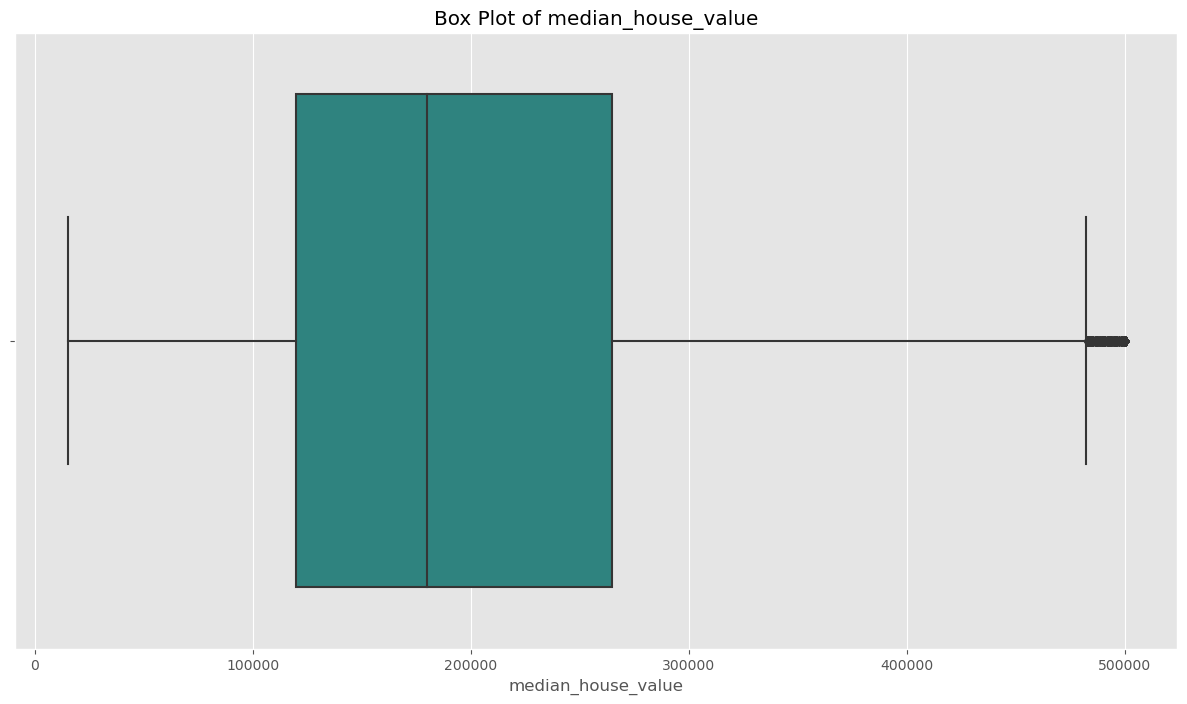

In [22]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.drop('ocean_proximity')

for col in numeric_columns:
    plt.figure(figsize=(15,8))
    g = sns.boxplot(data = df, x=df[col], palette='viridis')
    g.set_title(f'Box Plot of {col}')
    g.set_xlabel(col)
    plt.show()                 

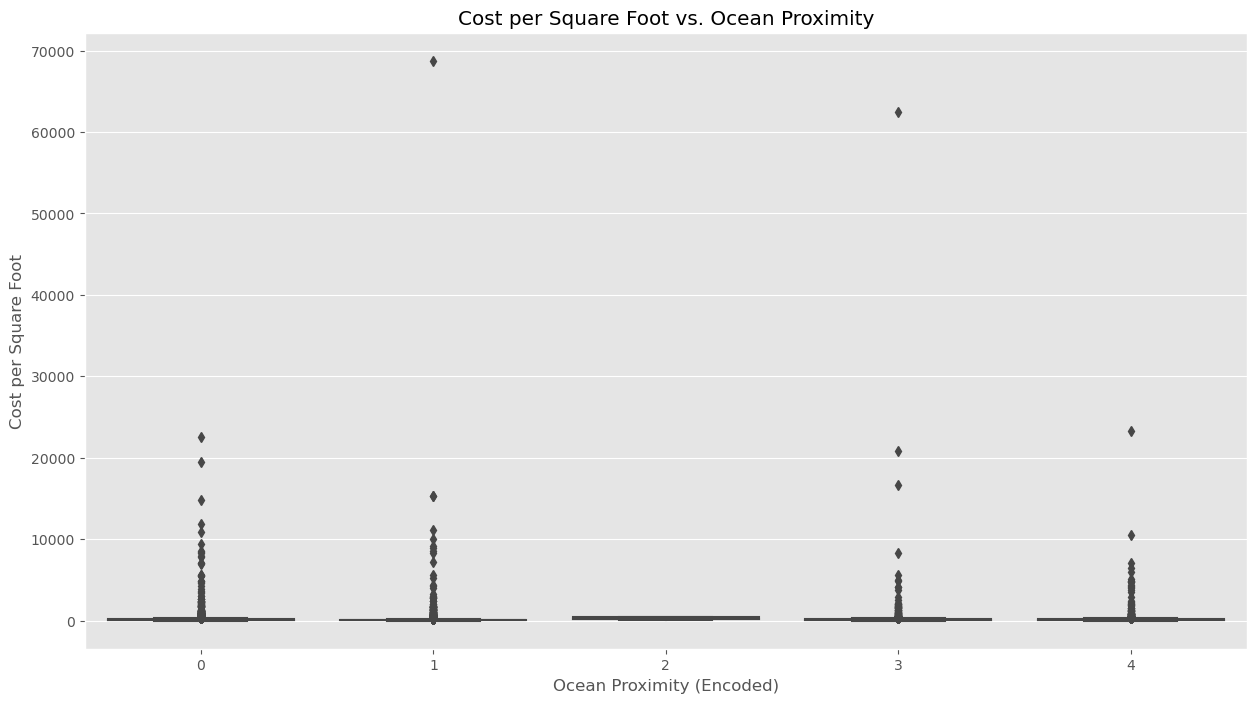

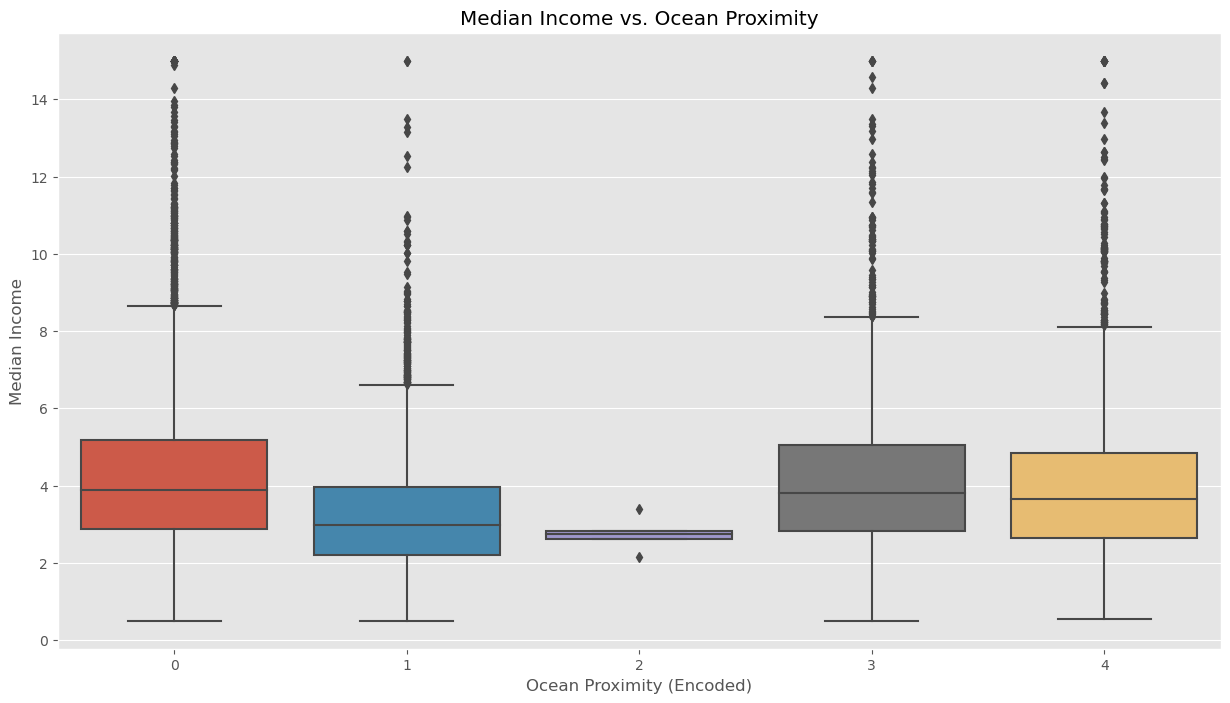

In [23]:
df['cost_per_sqft'] = df['median_house_value'] / df['total_rooms']

plt.figure(figsize=(15, 8))
sns.boxplot(x='ocean_proximity', y='cost_per_sqft', data=df)
plt.title('Cost per Square Foot vs. Ocean Proximity')
plt.xlabel('Ocean Proximity (Encoded)')
plt.ylabel('Cost per Square Foot')
plt.show()

plt.figure(figsize=(15, 8))
sns.boxplot(x='ocean_proximity', y='median_income', data=df)
plt.title('Median Income vs. Ocean Proximity')
plt.xlabel('Ocean Proximity (Encoded)')
plt.ylabel('Median Income')
plt.show()

12) Python function for distribution and relationship of a numerical column with a dataset

In [24]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def visualize_column_distribution(data, column_name):

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    sns.kdeplot(data[column_name], ax=axes[0], shade=True, color='skyblue', edgecolor ='black')
    axes[0].set_title(f'Distribution of {column_name} (KDE)')
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Density')
    
    sns.boxplot(x=data[column_name], ax=axes[1], color='skyblue')
    axes[1].set_title(f'Box Plot of {column_name}')
    axes[1].set_xlabel(column_name)
    
    sns.scatterplot(x=data[column_name], y=data['median_house_value'], ax=axes[2], color='skyblue')
    axes[2].set_title(f'{column_name} vs Median House Value')
    axes[2].set_xlabel(column_name)
    axes[2].set_ylabel('Median House Value')
    
    plt.tight_layout()
    plt.show()

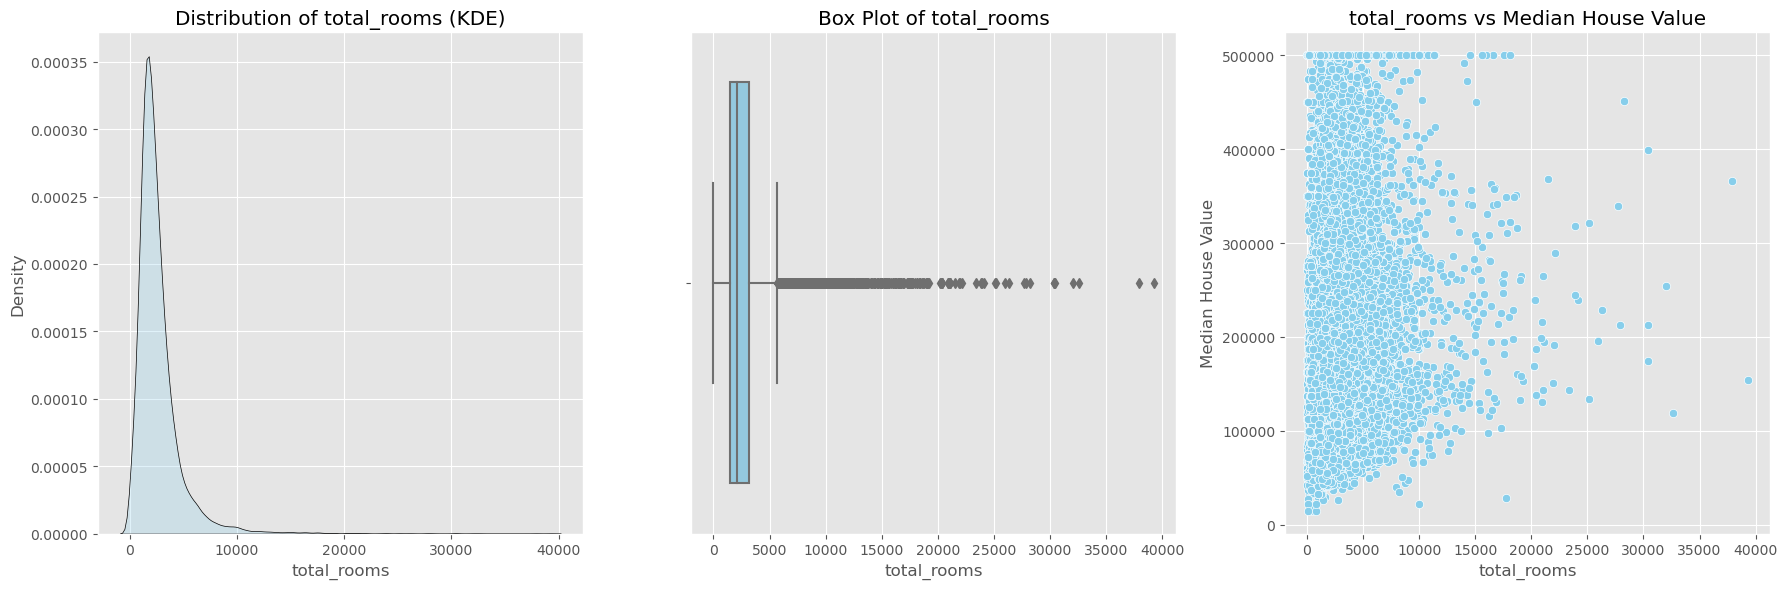

In [25]:
visualize_column_distribution(df, 'total_rooms')

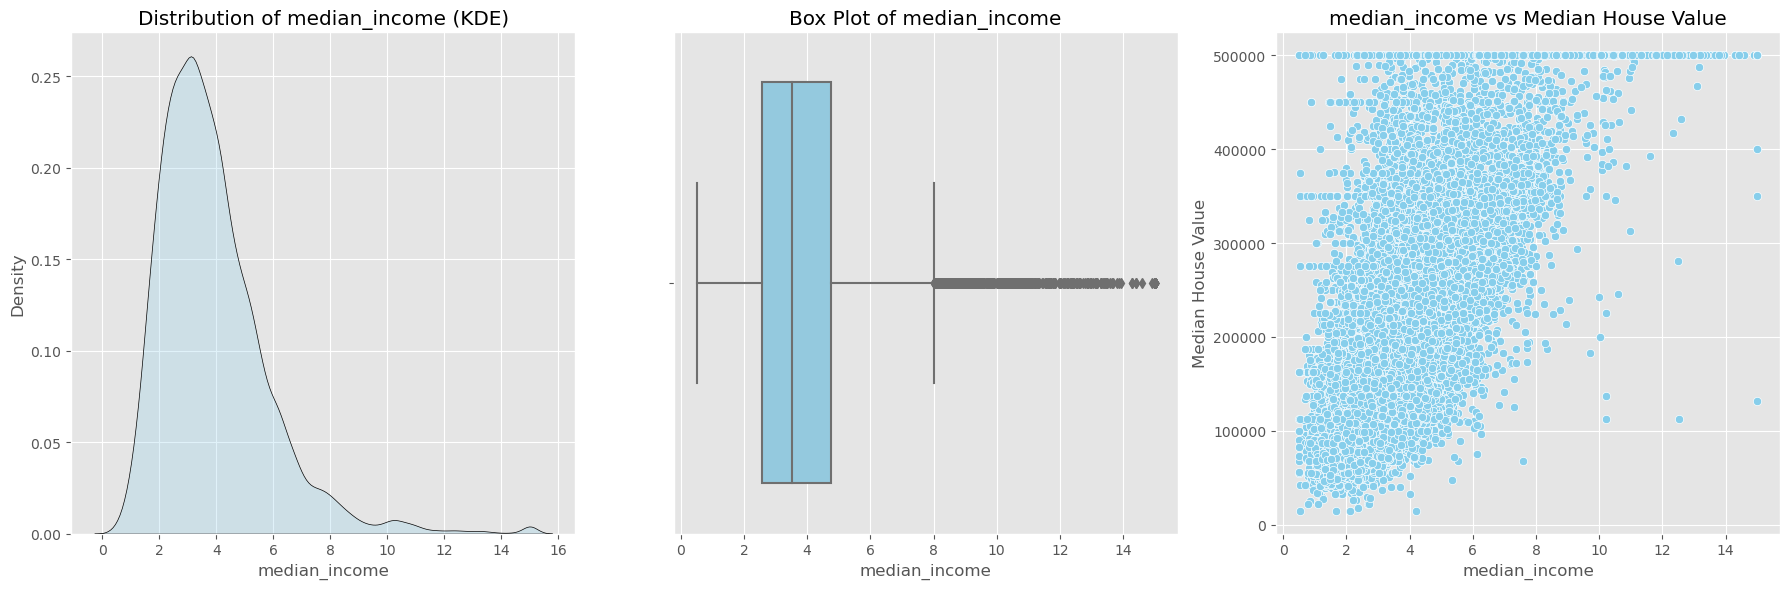

In [26]:
visualize_column_distribution(df, 'median_income')

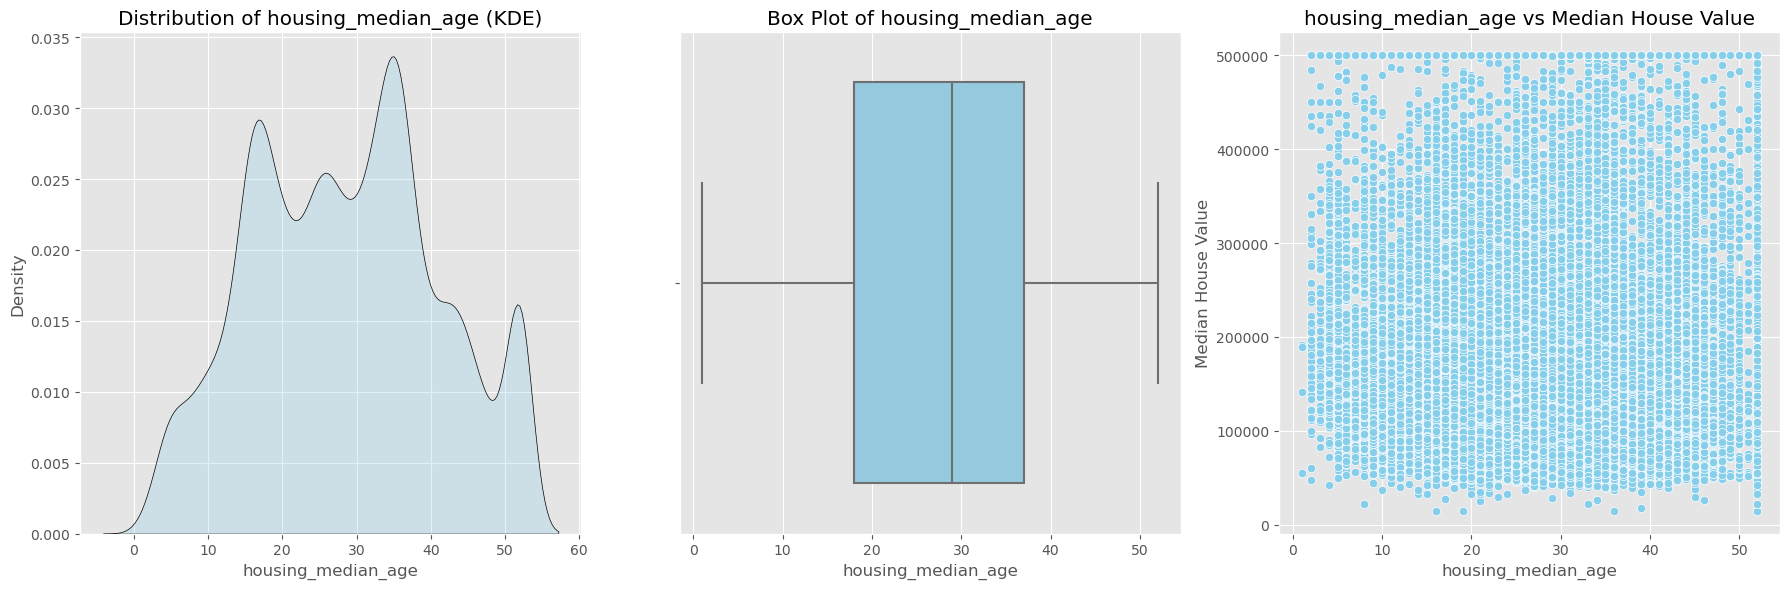

In [27]:
visualize_column_distribution(df, 'housing_median_age')

13) Identifying and visualising outliers in a numerical column

In [28]:
def identify_and_visualize_outliers(data, column_name):
    mean = data[column_name].mean()
    std_dev = data[column_name].std()

    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev

    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    num_outliers = outliers.shape[0]

    print(f"Mean of {column_name}: {mean}")
    print(f"Standard Deviation of {column_name}: {std_dev}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Number of outliers in {column_name}: {num_outliers}")

    plt.figure(figsize=(12, 6))
    
    sns.histplot(data[column_name], kde=False, color='skyblue', bins=50)
    
    plt.axvspan(data[column_name].min(), lower_bound, color='red', alpha=0.2, label='Outlier Region')
    plt.axvspan(upper_bound, data[column_name].max(), color='red', alpha=0.2)
    
    plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
    
    plt.title(f'Distribution of {column_name} with Outliers Highlighted')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    return outliers

Mean of median_house_value: 206855.81690891474
Standard Deviation of median_house_value: 115395.6158744132
Lower Bound: -23935.414839911653
Upper Bound: 437647.04865774116
Number of outliers in median_house_value: 1383


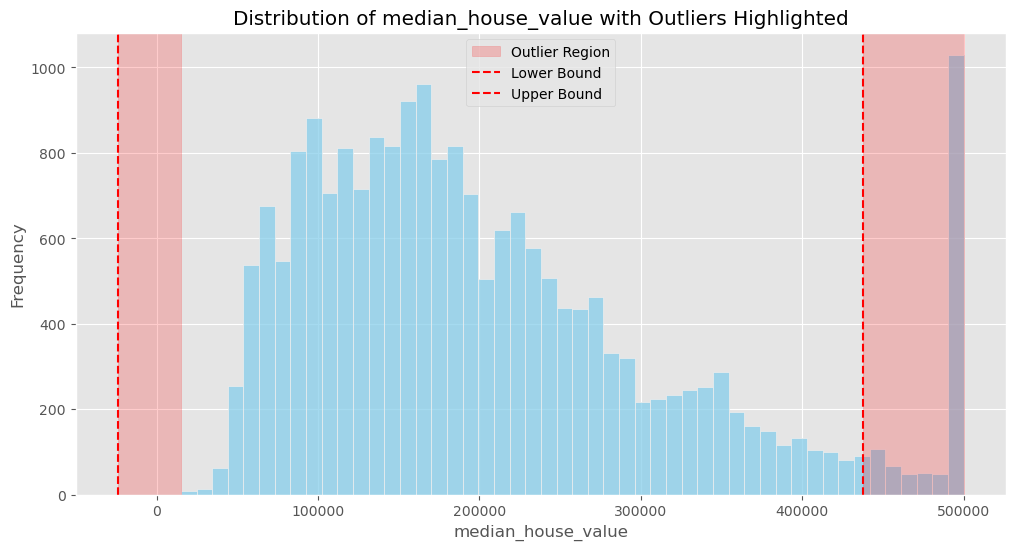

In [29]:
outliers = identify_and_visualize_outliers(df, 'median_house_value')

Mean of total_rooms: 2635.7630813953488
Standard Deviation of total_rooms: 2181.615251582787
Lower Bound: -1727.4674217702254
Upper Bound: 6998.993584560923
Number of outliers in total_rooms: 742


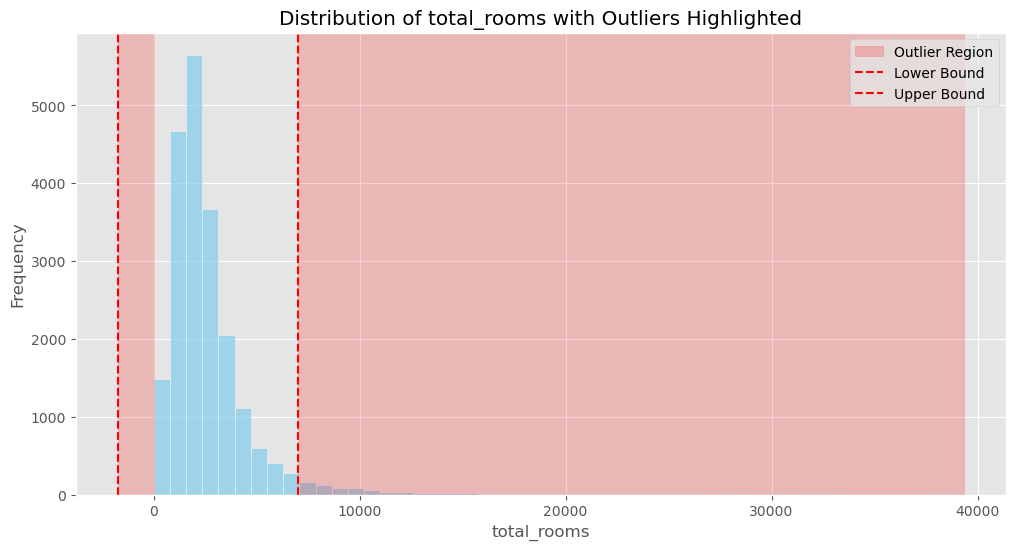

In [30]:
outliers = identify_and_visualize_outliers(df, 'total_rooms')

14) Feature Scaling

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer

label_encoder = LabelEncoder()

df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity'])

X = df.drop(['median_house_value'], axis=1).values
y = df['median_house_value'].values

mm_scaler = MinMaxScaler()
s_scaler = StandardScaler()

X_mm = mm_scaler.fit_transform(X)
X_s = s_scaler.fit_transform(X)

print(f"Min-Max Scaled Data:\n Min: {X_mm.min(axis=0)}\n Max: {X_mm.max(axis=0)}\n")
print(f"Standard Scaled Data:\n Mean: {X_s.mean(axis=0)}\n Std: {X_s.std(axis=0)}\n")

Min-Max Scaled Data:
 Min: [ 0.  0.  0.  0. nan  0.  0.  0.  0.  0.]
 Max: [ 1.  1.  1.  1. nan  1.  1.  1.  1.  1.]

Standard Scaled Data:
 Mean: [-8.52651283e-15 -1.07958431e-15  5.50808322e-18  3.20157337e-17
             nan -1.10161664e-17  6.88510403e-17  6.60969987e-17
 -5.50808322e-18  8.95063524e-18]
 Std: [ 1.  1.  1.  1. nan  1.  1.  1.  1.  1.]



In [32]:
r_scaler = RobustScaler()
q_scaler = QuantileTransformer(output_distribution='normal')
p_transformer = PowerTransformer()

X_r = r_scaler.fit_transform(X)
X_q = q_scaler.fit_transform(X)
X_p = p_transformer.fit_transform(X)

print(f"Robust Scaled Data:\n Min: {X_r.min(axis=0)}\n Max: {X_r.max(axis=0)}\n")
print(f"Quantile Transformed Data:\n Mean: {X_q.mean(axis=0)}\n Std: {X_q.std(axis=0)}\n")
print(f"Power Transformed Data:\n Mean: {X_p.mean(axis=0)}\n Std: {X_p.std(axis=0)}\n")

Robust Scaled Data:
 Min: [-1.54617414 -0.45502646 -1.47368421 -1.2498162          nan -1.23987207
 -1.25538462 -1.39225176 -1.         -0.92093954]
 Max: [  1.10290237   2.03439153   1.21052632  21.87501838          nan
  36.79744136  17.45538462   5.25967383   3.         762.19818862]

Quantile Transformed Data:
 Mean: [-1.53472002e-04  8.72291820e-05  1.99310376e-01  3.37714985e-05
             nan -1.11493176e-04 -1.48898140e-04  4.03586363e-03
 -1.45014496e+00 -4.47595976e-05]
 Std: [0.99969015 1.00082671 1.54171274 0.99985773        nan 0.99980158
 0.99982157 1.02433087 3.66812474 0.99958402]

Power Transformed Data:
 Mean: [ 3.66443525e-18 -8.57559974e-09 -1.21177831e-16 -7.02280611e-17
             nan  6.80248278e-16  7.02280611e-16  7.38083152e-16
 -6.60969987e-17 -6.05889155e-16]
 Std: [1.85554645e-15 1.00000000e+00 1.00000000e+00 1.00000000e+00
            nan 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00]



#### The End